In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from utils import HousePriceData, TestingData
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tqdm import tqdm

In [25]:
pca_list = list(range(1,68))

In [29]:
replace_by = [
    "Z", 
    "NA",
    "None",          #Can be changed to NonewNA
    "Z",             #Can be changed to ZwM
    "NA",
    "NA",
    "NA",            #Includes option "No" but mean different thing
    "NA",
    "NA",
    "SBrkr",            #Electrical, only 1 NA
    "NA",
    "NA",
    "Z",             #Can be changed to Z
    "NA",
    "NA",
    "NA",
    "NA",
    "NA",
    "NA"
    ]



In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [36]:
import warnings
warnings.filterwarnings('ignore')

train_score = []
test_score = []
correlation_thresholds = [0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45]
for pca in tqdm(pca_list):
    x_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca)),
    ])
    output_scaler = StandardScaler()

    data = HousePriceData("dataset/train.csv", x_scaler, output_scaler)
    null_cols = data.check_na(print_null_cols=False)
    data.clean_data(null_cols, replace_by)

    mapping = data.convert_to_categorical()

    data.get_dataframe()

    # output_column = 'SalePrice'

    # # Calculate correlation coefficients between all columns and the output column
    # correlations = data.get_dataframe().corr(method="pearson")[output_column]

    # # Filter columns based on the specified range
    # selected_columns = correlations[(correlations <= 0.25) & (correlations >= -0.25)].index.tolist()
    # for column in selected_columns:
    #     data.drop_column(column)
    
    data.fit_preprocessors()

    X_train, X_test, y_train, y_test = data.get_train_test_split()
    classifier = SVR()

    classifier.fit(X_train, y_train)
    train_score.append(classifier.score(X_train, y_train))
    test_score.append(classifier.score(X_test, y_test))




  0%|          | 0/67 [00:00<?, ?it/s]

100%|██████████| 67/67 [01:44<00:00,  1.56s/it]


In [37]:
import matplotlib.pyplot as plt

In [38]:
train_score

[0.8280049194580056,
 0.8518014908144166,
 0.8575920198859894,
 0.8661137865665873,
 0.8676862164644785,
 0.8723104603140188,
 0.8702275075599435,
 0.8726163332321548,
 0.873022944228135,
 0.8749015442785569,
 0.8772077502459256,
 0.8804704953489201,
 0.8863482117203236,
 0.8878101214116804,
 0.8905274311855835,
 0.8893467338512497,
 0.8893258153713072,
 0.8902673758902542,
 0.8937994087091949,
 0.8918669235224546,
 0.8954628792809883,
 0.896648122649285,
 0.8969458131429745,
 0.8967912143171157,
 0.8989923872508621,
 0.898787001628792,
 0.8998364938011173,
 0.8995852358200518,
 0.9010315957763672,
 0.900624205530772,
 0.9016651255655542,
 0.901498399048137,
 0.9028994137677941,
 0.9026050106461858,
 0.9027694972757023,
 0.9041410000588285,
 0.9045040900004006,
 0.9045415083816525,
 0.9057219564898332,
 0.9060464432459152,
 0.906571346131104,
 0.9069154851196405,
 0.9073556427018428,
 0.9071108730005732,
 0.906992539073227,
 0.9072963477089657,
 0.9074050659585028,
 0.9076056598456329,

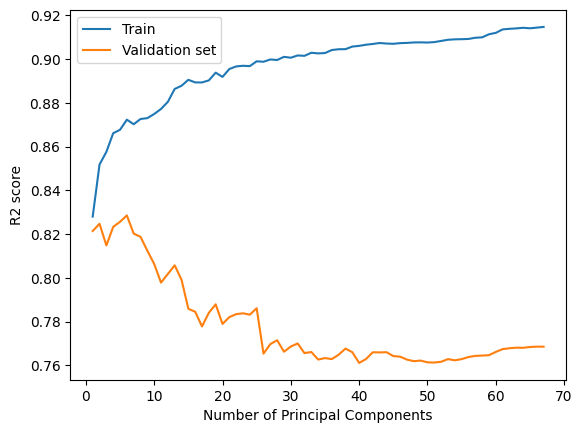

In [39]:
plt.plot(pca_list, train_score, label="Train")
plt.plot(pca_list, test_score, label = "Validation set")
plt.ylabel("R2 score")
plt.xlabel("Number of Principal Components")
plt.legend()
plt.show()